In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
#looking at top 5 rows of df
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [4]:
#Looking at bottom 5 rows
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


### Q5.)How many rows and columns are in gdp_df? What are the data types of each column?

In [5]:
gdp_df.shape

(7662, 4)

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


#### Answer 5.) 7662 rows; 4 columns
#### column 0 Dtype = object
#### column 1 Dtype = int
#### column 2 Dtype = float
#### column 3 Dtype = float

### Q6.)Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'GDP_Per_Capita'}, inplace=True)

In [8]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   GDP_Per_Capita   7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [9]:
gdp_df.drop(columns=['Value Footnotes'], inplace=True)

In [10]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


##### Q6 Answer above^

#### Q7.) How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [11]:
gdp_df["Country"].value_counts().reset_index()

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


#### Answer 7.) any country with less than 33 as the count is mmissing years of data

### Q8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [12]:
### building table for year 2020
y2020 = gdp_df[gdp_df['Year'] == 2020].sort_values('GDP_Per_Capita', ascending=False)
y2020


,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


(array([77., 34., 42., 18., 11., 13.,  7., 12.,  7.,  8.,  4.,  1.,  3.,
         1.,  0.,  1.,  2.,  0.,  0.,  1.]),
 array([   711.35526342,   6263.35323782,  11815.35121222,  17367.34918661,
         22919.34716101,  28471.34513541,  34023.3431098 ,  39575.3410842 ,
         45127.3390586 ,  50679.337033  ,  56231.33500739,  61783.33298179,
         67335.33095619,  72887.32893058,  78439.32690498,  83991.32487938,
         89543.32285377,  95095.32082817, 100647.31880257, 106199.31677696,
        111751.31475136]),
 <BarContainer object of 20 artists>)

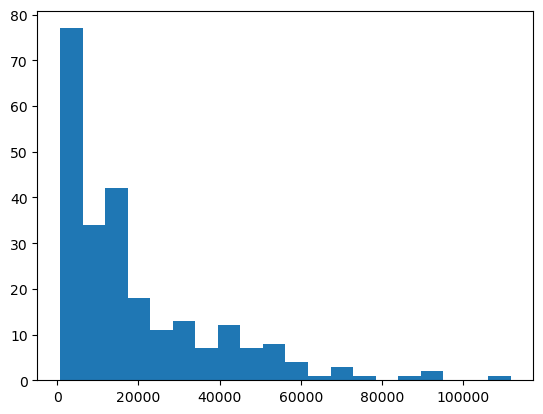

In [13]:
### histogram using matplotlib

plt.hist(y2020.GDP_Per_Capita, bins=20)


C:\Users\KatieClay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

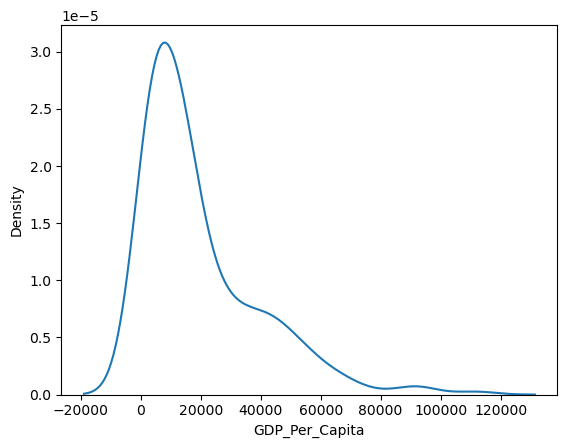

In [14]:
### density chart
sns.kdeplot(y2020['GDP_Per_Capita'])


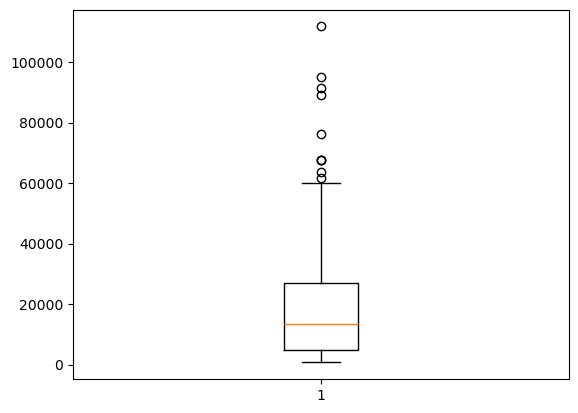

In [15]:
### boxplot
fig, ax = plt.subplots()
ax.boxplot(y2020['GDP_Per_Capita'])
plt.show()


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

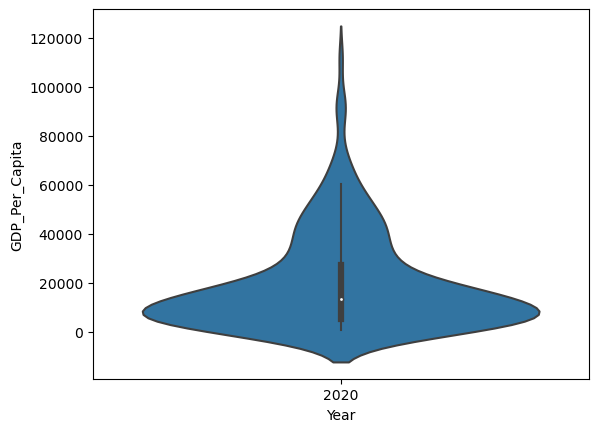

In [16]:
sns.violinplot(x=y2020["Year"], y=y2020["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

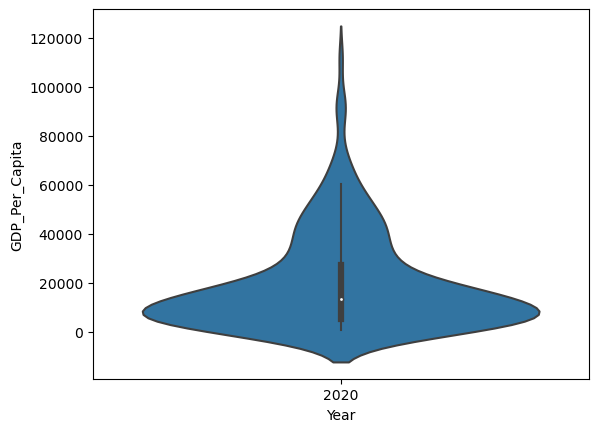

In [17]:
### Violin
sns.violinplot(x=y2020["Year"], y=y2020["GDP_Per_Capita"])

#### Answer Q8.) All plots above


### Q9.) What was the median GDP per capita value in 2020?

In [18]:
gdp_df.groupby("Year")["GDP_Per_Capita"].median().reset_index()

,Year,GDP_Per_Capita
0,1990,6223.452994
1,1991,6360.469210
2,1992,6209.463742
3,1993,6091.534418
4,1994,6171.059251
5,1995,6749.160113
6,1996,7174.626665
7,1997,7297.913083
8,1998,7555.550529
9,1999,7806.963355


#### Answer: 2020 median GDP per capital = 13,357.99

### Q10.)For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots: boxplot,  barplo, A scatterpl, 
A scatterplo/  a trend llot.

In [19]:
gdp_decades = gdp_df.loc[gdp_df.Year.isin([1990,2000,2010,2020])]
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

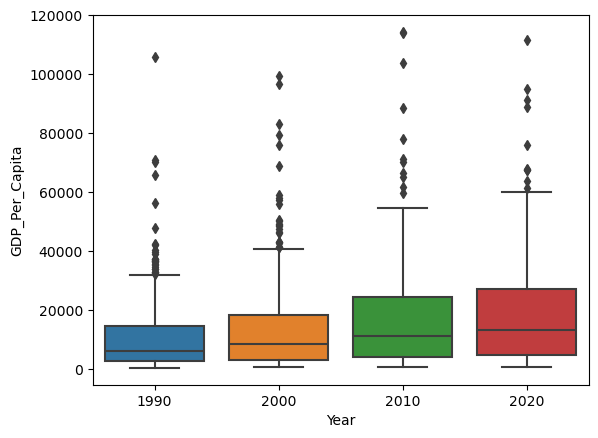

In [20]:
### boxplot
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

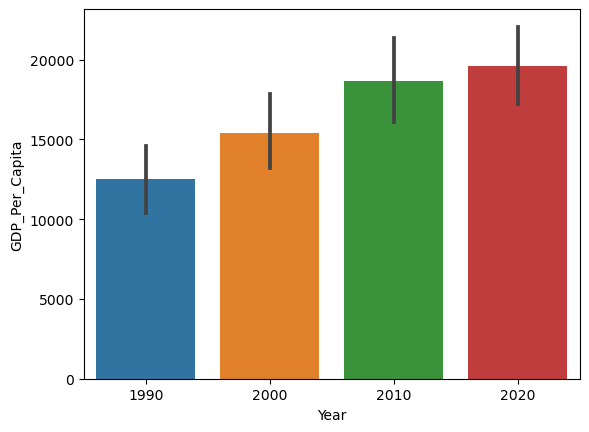

In [21]:
### barplot
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades)

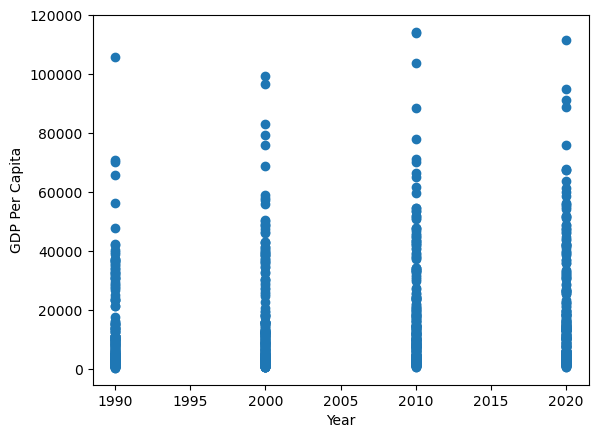

In [22]:
### Scatterplot
plt.scatter(gdp_decades.Year, gdp_decades.GDP_Per_Capita)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.show()

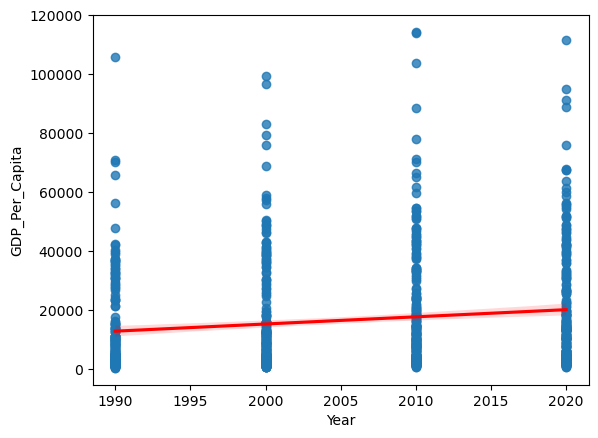

In [23]:
### scatterplot with trendline
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
        line_kws={"color": "r"},)
plt.show()

#### ANSWER 10.) GDP per capita has gone up over the years slowly

### Q11.) Which country was the first to have a GDP per capita greater than $100,000?

In [24]:
gdp_df[gdp_df['GDP_Per_Capita']> 100000].sort_values('Year').head()


,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098


#### ANSWER 11.) UNITED ARAB EMIRATES 1990





### Q12.) Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.


In [25]:
y2020[y2020.GDP_Per_Capita == y2020.GDP_Per_Capita.max()]

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [26]:
Lux = gdp_df[gdp_df.Country == 'Luxembourg']

<Axes: xlabel='Year'>

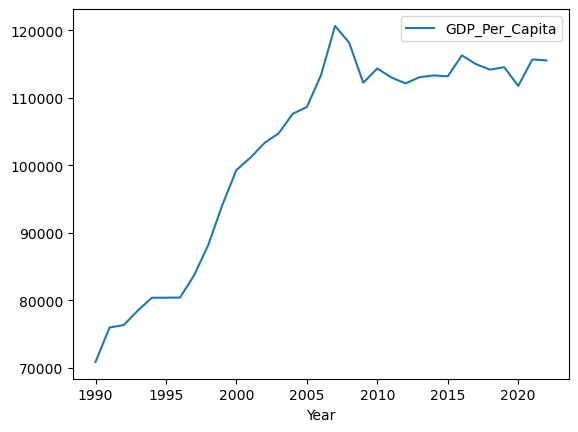

In [27]:
## Create plot for Lux

Lux.plot('Year', 'GDP_Per_Capita')

### Q13.) Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [28]:
y2020[y2020.GDP_Per_Capita == y2020.GDP_Per_Capita.min()]

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [29]:
Bur= gdp_df[gdp_df.Country == 'Burundi']

<Axes: xlabel='Year'>

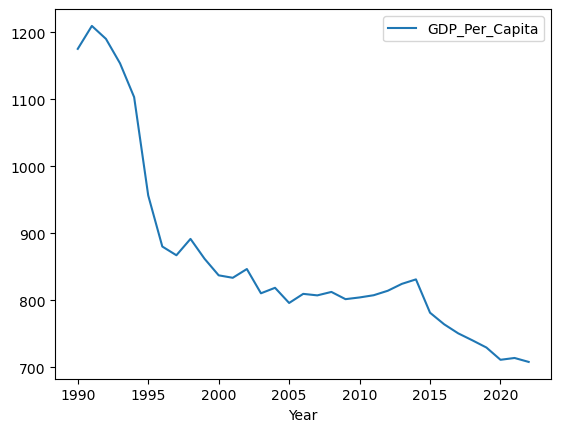

In [30]:
Bur.plot('Year', 'GDP_Per_Capita')

### Q14.) Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [31]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=4495)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [32]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [33]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


### Q15.) Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.



In [34]:
internet_df = internet_df.drop(columns="Value Footnotes")
internet_df

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [43]:
internet_df = internet_df.rename(columns= {'Country or Area':'Country', 'Value':'Internet_User_Pct'})
internet_df

,Country,Year,Internet_User_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


### Q16.) Look at the number of observations in this dataset per year. What do you notice?

In [44]:
internet_df.Year.value_counts()

Year
1990    210
2011    207
2007    206
2008    204
2012    203
2010    203
2009    203
2014    202
2013    202
2002    202
2005    201
2001    201
2006    200
2000    199
2004    199
1999    198
2003    196
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1980      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1982      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1960      7
Name: count, dtype: int64

#### ANSWER 16.) ??????????

### Q17.) What is the first year to have a non-zero internet users percentage value?

In [48]:
internet_df[internet_df['Internet_User_Pct'] > 0].sort_values('Year').head()

,Country,Year,Internet_User_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729


#### ANSWER Q17: 1990

### Q18.) How does the distribution of internet users percent differ for 2000 and 2014?